In [78]:
from scipy.integrate import solve_ivp
from scipy.special import lambertw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use(
    [
        'nature',
        'science',
        'grid',
        'notebook',
    ]
)

In [79]:
r = .125  # raio do bico (m)
h = .1  # altura do bico (m)
generatriz = np.sqrt(r**2 + h**2)  # geratriz do cone

# Arrasto
A = np.pi * r**2
cd = .425  # coeficiente de arrasto
rho = 1.1839

m = .875  # massa do foguete
g = 9.80665  # aceleracao gravitacional

V_0 = 30  # modulo da velocidade inicial (m/s)
theta = np.pi/4  # angulo de lancamento (rad)

V0_X = V_0 * np.cos(theta)  # componente horizontal da velocidade inicial
V0_Y = V_0 * np.sin(theta)  # componente vertical da velociade inicial

X_0 = .0  # posicao horizontal inicial
Y_0 = 1e-3 # posicao vertical inicial

In [80]:
A, cd, rho

(0.04908738521234052, 0.425, 1.1839)

In [81]:
simulation_time = 60  # duracao da simulacao
simulation_step = 1e-3  # tempo de simulacao

iterations = int(simulation_time / simulation_step)

time = np.linspace(.0, simulation_time, iterations)
time_span = [time[0], time[-1]]

In [82]:
def dSdt(_, S):
    _, vx, y, vy = S

    if y < 0:
        vy = 0

    return [
        vx,
        (-A * cd * rho * vx**2) / (2*m),
        vy,
        (-(A * cd * rho * vy**2) / (2*m)) - g
    ]

sol = solve_ivp(
    dSdt,
    time_span,
    [X_0, V0_X, Y_0, V0_Y],
    t_eval=time
)

x = sol.y[0]  # solucao de x
x_dot = sol.y[1] # solucao de x_dot

y = sol.y[2]  # solucao de y
y_dot = sol.y[3] # solucao de y_dot

In [83]:
# y index where y = 0
y_zero_index = np.argmin(y)  # indice onde y = 0

# tempo necessario para alcancar o zero de y
time_to_reach_zero = time[y_zero_index]

# alcance horizontal
max_x_index = np.argmax(x[:y_zero_index])
horizontal_range = x[max_x_index]

# alcance vertical
max_y_index = np.argmax(y[:y_zero_index])
vertical_range = y[max_y_index]

# alcances teoricos
theorical_horizontal_range = 2*V0_X*m/(A*cd*rho) - 2*V0_X*m*np.exp(-(A*V0_Y*cd*rho + 2*g*m*lambertw(-np.sqrt((A**2*V0_Y**2*cd**2*rho**2 + 4*A*V0_Y*cd*g*m*rho + 4*g**2*m**2)*np.exp(-A*V0_Y*cd*rho/(g*m)))*np.exp(-1)/(2*g*m)) + 2*g*m)/(2*g*m))/(A*cd*rho)
theorical_vertical_range = 2*m*(A*V0_Y*cd*rho - 2*g*m*np.log(A*V0_Y*cd*rho + 2*g*m) + np.log(2**(2*g*m)*g**(2*g*m)*m**(2*g*m)))/(A**2*cd**2*rho**2)

In [84]:
theorical_horizontal_range, theorical_vertical_range

((88.16738906578667+0j), 22.487079295261584)

In [85]:
horizontal_range, vertical_range

(52.256913836233096, 17.689986123645834)

In [86]:
simulation_data = {
    'time': time,
    'x': x,
    'y': y
}

# save to xslx
pd.DataFrame(simulation_data).to_excel(
    '../data/air_resistance/simulation_data.xlsx',
    index=False
)

with open('../data/air_resistance/simulation_info.txt', 'w') as file:
    file.write('Simulacao de foguete com massa constante\n')
    file.write('\n')
    file.write('Massa: {}'.format(m))
    file.write('\n')
    file.write('Coeficiente de resistencia aerodinamica: {}'.format(cd))
    file.write('\n')
    file.write('Aceleracao gravitacional: {}'.format(g))
    file.write('\n')
    file.write('\nVelocidade inicial: {}'.format(V_0))
    file.write('\nAngulo de lancamento: {}'.format(np.rad2deg(theta)))
    file.write('\n')
    file.write('Tempo de simulacao: {}'.format(simulation_time))
    file.write('\n')
    file.write('Passo de simulacao: {}'.format(simulation_step))
    file.write('\n')
    file.write('\n')
    file.write('Tempo necessario para alcancar o zero de y: {}'.format(time_to_reach_zero))
    file.write('\n')
    file.write('\n')
    file.write('Alcance vertical (simulado | teorico): {} | {}'.format(vertical_range, theorical_vertical_range))
    file.write('\n')
    file.write('Alcance horizontal (simulado | teorico): {} | {}'.format(horizontal_range, theorical_horizontal_range))
    file.write('\n')

    file.close()

In [87]:
time = time[:y_zero_index]

x = x[:y_zero_index]
x_dot = x_dot[:y_zero_index]

y = y[:y_zero_index]
y_dot = y_dot[:y_zero_index]

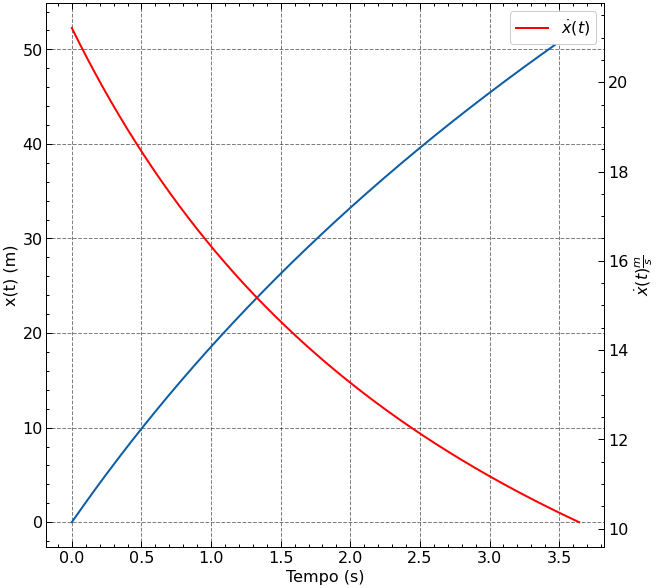

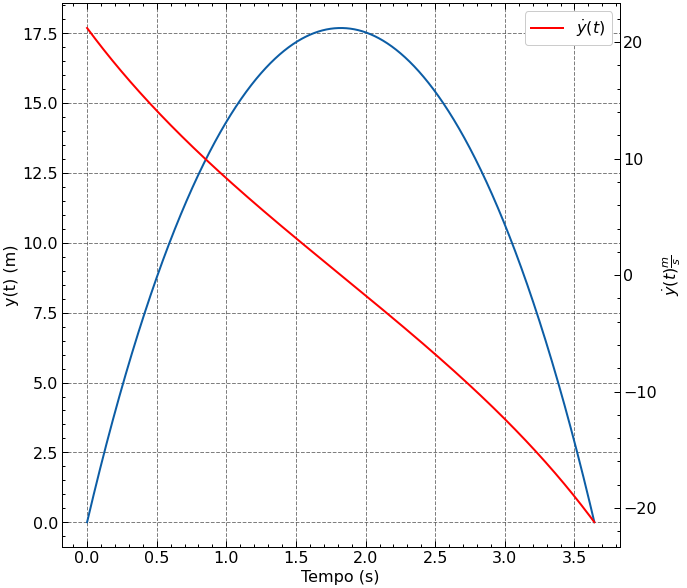

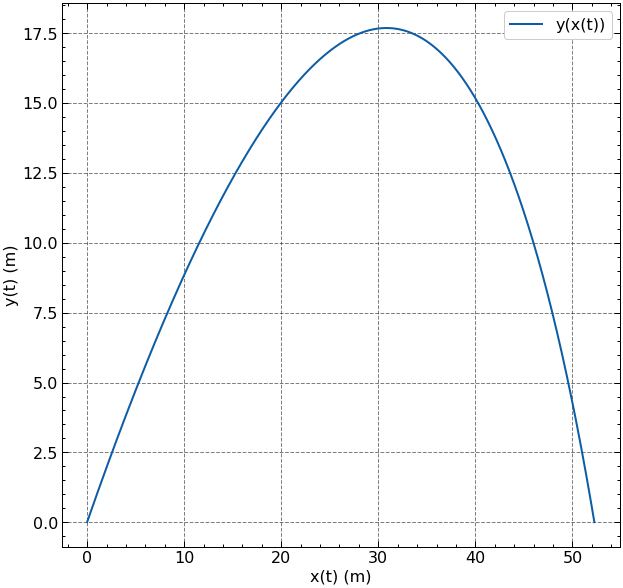

In [88]:
fig1, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(time, x, label='x(t)')

ax2 = axs.twinx()
ax2.plot(time, x_dot, color='red', label=r'$\dot{x}(t)$')

axs.set_xlabel('Tempo (s)')
axs.set_ylabel('x(t) (m)')

ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel(r'$\dot{x}(t) \frac{m}{s}$')

plt.grid(False)

plt.legend()

plt.savefig('../images/air_resistance/sim_x_t.png', dpi=300)

fig2, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(time, y, label='y(t)')

ax2 = axs.twinx()
ax2.plot(time, y_dot, color='red', label=r'$\dot{y}(t)$')

axs.set_xlabel('Tempo (s)')
axs.set_ylabel('y(t) (m)')

ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel(r'$\dot{y}(t) \frac{m}{s}$')

plt.grid(False)

plt.legend()

plt.savefig('../images/air_resistance/sim_y_t.png', dpi=300)

fig3, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(x, y, label='y(x(t))')
axs.set_xlabel('x(t) (m)')
axs.set_ylabel('y(t) (m)')

plt.legend()

plt.savefig('../images/air_resistance/sim_y_x.png', dpi=300)